In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("C:/Users/minvo3/hackathon/model_input/train.csv")

In [8]:
# Select the features (questions) and target variable (Class/ASD)
X = df.loc[:, "A1_Score":"A10_Score"]
y = df["Class/ASD"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8625
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       124
           1       0.73      0.61      0.67        36

    accuracy                           0.86       160
   macro avg       0.81      0.77      0.79       160
weighted avg       0.86      0.86      0.86       160



Apply high-level questions for questions with higher performance:
A4_Score
A5_Score
A6_Score
A7_Score
A9_Score
Apply equal or below-level questions for questions with lower performance:
A1_Score
A2_Score
A3_Score
A8_Score
A10_Score


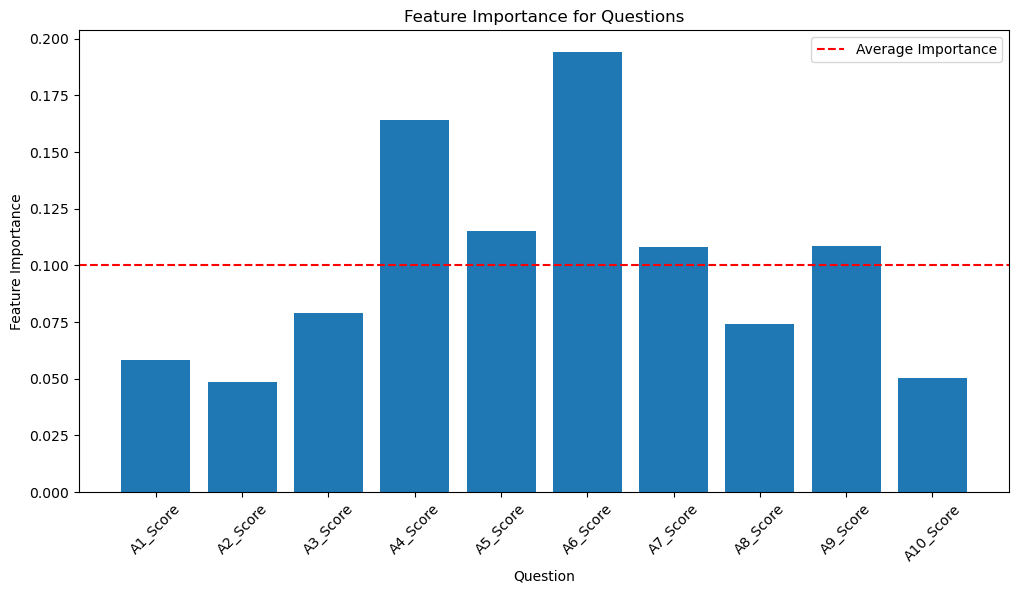

In [9]:
# Get feature importances
importances = model.feature_importances_

# Get the names of the questions
question_names = X.columns

# Calculate the average importance
average_importance = np.mean(importances)

# Define a threshold for deciding what is "higher" or "lower" than the average
threshold = average_importance

# Classify questions into "higher" and "lower" than average
higher_than_avg = [i for i, imp in enumerate(importances) if imp > threshold]
lower_than_avg = [i for i, imp in enumerate(importances) if imp <= threshold]

# Decision logic based on classification
if len(higher_than_avg) > 0:
    print("Apply high-level questions for questions with higher performance:")
    for i in higher_than_avg:
        print(question_names[i])
else:
    print("No high-level questions to apply.")

if len(lower_than_avg) > 0:
    print("Apply equal or below-level questions for questions with lower performance:")
    for i in lower_than_avg:
        print(question_names[i])
else:
    print("No equal or below-level questions to apply.")

# Create a bar chart to visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), question_names, rotation=45)
plt.axhline(y=average_importance, color='r', linestyle='--', label='Average Importance')
plt.xlabel('Question')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Questions')
plt.legend()
plt.show()